In [51]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.rcParams.update(
    {
        "lines.markersize": 10, 
        "font.size": 15, 
        "xtick.major.size": 5,
        "ytick.major.size": 5,
    }
)

In [52]:
#Then we load the csv data
df = pd.read_csv("netflix_titles.csv")
print(len(df))

8807


The next question is who directed the movie called Layer Cake. This is a question of how to locate a specific row using one of the datapoints within that row. We explored this last week in the notes section

In [53]:
print(df.loc[df['title'] == 'Layer Cake']) # this identifies the row with something in the title column that matches with layer cake

    show_id   type       title        director  \
891    s892  Movie  Layer Cake  Matthew Vaughn   

                                                  cast         country  \
891  Daniel Craig, Colm Meaney, Kenneth Cranham, Si...  United Kingdom   

       date_added  release_year rating duration  \
891  May 13, 2021          2004      R  105 min   

                                             listed_in  \
891  Independent Movies, International Movies, Thri...   

                                           description  
891  A suave, steely-eyed London cocaine dealer's r...  


In [54]:
print(df["director"].loc[df["title"] == 'Layer Cake'])
#When printed, this returns Mathew Vaughn
#The .loc method and its working. This is used to identify a row in general. 
# df.loc[df[column_to_look_into] == the_value_to_look_for] - this is the for entire row identification
#df[column_data_to_pick_once_filtered].loc[df[column_to_look_into] == the_value_to_look_for] - this is the for entire row identification


891    Matthew Vaughn
Name: director, dtype: object


In [55]:
#Alternative method
valid_rows = df["title"].str.contains("Layer Cake") # This is a filter returning false and true (for where it is true)
print(df[valid_rows]["director"])

891    Matthew Vaughn
Name: director, dtype: object


The next question is about how many seasons there were in Castlevania. This is the same approach as the previous question except we are printing different variables now

In [56]:
print(df["duration"].loc[df["title"] == "Castlevania"])
#When printed, this returns 4 seasons meaning that there were four seasons
print(type(df["duration"].loc[df["title"] == "Castlevania"])) #when run, return a pandas class. To manipulate this further, we might need to convert it into a string or something

890    4 Seasons
Name: duration, dtype: object
<class 'pandas.core.series.Series'>


Then we are asked about who the lead actor was. It is the same method except we are looking into a different

In [57]:
print(df["cast"].loc[df["title"] == "Castlevania"])
#When run, this returns  Richard Armitage, James Callis, Graham McTavis...in which case we assume that Richard Armitage was the lead actor

890    Richard Armitage, James Callis, Graham McTavis...
Name: cast, dtype: object


The next question is about how many shows had been created in the UK. There are two approaches for this. We could use the groupby method or we could use the string method that looks into strings that have UK in them. Actually, the method in the previous question would work well for this except now we are going to be printing the length

In [58]:
print(len(df.loc[df["country"] == "United Kingdom"]))
#When run, this returns 419 meaning that we have 419 shows based in the UK. However, remember that the dataframe contains NaN values that we are choosing to ignore

419


The next question is to identify which was the longest show on Netflix. For this, we are using the same approach as the previous questions except we are using the .max method. There are two datatypes - TV shows and films. First, we need to narrow this down to films alone then from there, we can compute which one was the longest

In [59]:
movies = df.loc[df["type"] == "Movie"] # this returns 6131 rows but with the same 12 columns. This dataframe, therefore, contains only movie elements (which in this case, we are considering to be the films)
print(len(movies)) 

6131


In [60]:
#The next thing is to extract the integer values of the time and append it to a new column
movies["integer_time"] = movies["duration"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
#How does this work? We are, first of all, lookint into the 'duration' column. Then we are converting all the data within that set into string (just in case we had some data in a non-string format). Then, we are extracting every integer (by the \d+) and saving it as an integer. Might need to look into what the other values might mean

print(movies["integer_time"].max()) # This returns 312 i.e., 312 minutes for the longest film. Now its just a question of identifying which column this one is in
max_time = movies["integer_time"].max()
print(movies["title"].loc[movies["integer_time"] == max_time]) # This returns Black Mirror - Bandersnatch


312.0
4253    Black Mirror: Bandersnatch
Name: title, dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_19488\265024068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["integer_time"] = movies["duration"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


In [61]:
#An alternative, more compressed line of code to do the same identification is as shown:
print(movies["title"].loc[movies["integer_time"] == movies["integer_time"].max()]) # Returns Black Mirror -Bandersnatch as we expected

4253    Black Mirror: Bandersnatch
Name: title, dtype: object


The next question is about the mean and median number of seasons for the TV shows. This follows the same approach as the previous question in that we will start by filtering TV shows, then convert the number of seasons into integer types then after that, now compute the mean and median using standard pandas models.

In [62]:
TV_shows = df.loc[df["type"] == "TV Show"]
print(len(TV_shows)) # When run, this returns 2676 items which is in line with what we expected

2676


In [63]:
#Next step is to extract the duration row and save it as an integer
TV_shows["integer_time"] = TV_shows["duration"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
TV_shows

C:\Users\User\AppData\Local\Temp\ipykernel_19488\685560205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_shows["integer_time"] = TV_shows["duration"].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,integer_time
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,3
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",1


In [64]:
#Now we need to calculate the mean and median time
print(f"The mean for the TV shows seasons is {TV_shows['integer_time'].mean()} seasons") # this returns 1.764947683109118 seasons
print(f"The median for the TV shows is {TV_shows['integer_time'].median()} seasons") #This returns 1.0

The mean for the TV shows seasons is 1.764947683109118 seasons
The median for the TV shows is 1.0 seasons


The next question is of the person who has been in the most movies. For this, we can use the mode() approach. It works on both integers and strings so no need to convert

In [65]:
#Since it is a question about shows, we are still using the TV shows dataframe
print(f"The most cast character is:{TV_shows['cast'].mode()}") # When run, this returns David Attenborough. How many shows has he been in? To find that out, we might need to set the filter

The most cast character is:0    David Attenborough
Name: cast, dtype: object


In [66]:
Attenborough_shows = df.loc[df["cast"] == "David Attenborough"]
print(len(Attenborough_shows)) # this returns 19 which means that in total, he has been in 19 TV shows. True? Hopefully

19


In [1]:
#Alternative method. This is actually the right method.
import numpy as np
from collections import Counter
df_cast = df.dropna(subset = ["cast"]) # This looks into the cast column and drops all the NaN values. This removes the entire row
print(len(df_cast)) # This returns 7892

all_cast = df_cast["cast"].str.split(",").to_list() #to_numpy converts to numpy array type. The .flatten reduces all the list of cast 
all_cast = [item for sublist in all_cast for item in sublist] #this flattens it. 
print(len(all_cast))
c = Counter(all_cast)
print(c.most_common(1)) #This prints the 2 most common. Readjusted this to 1 to show the most repeated
#[(' Anupam Kher', 39), (' Rupa Bhimani', 31)] This is what it returns. The number is right but it should return 43 for the number of times.

#Later on, try do the for loop approach

NameError: name 'df' is not defined

For the next section, we are now moving into data visualisation. We have already imported all the libraries so it is just to implement them now

The first question is the barplot showing the different shows and their ratings. Basically, it is a question of how many shows are rated PG-13? How many shows are rated TV-MA? For this, we can use the groupby, I think

In [68]:
ratings = TV_shows.groupby(['rating'], as_index = False).size() #as_index = False says that we don't have an index from the data so the program creates one for us instead. With this, we are able to access the data as a standard dataframe
#Note that the alternative would be to use the .value_sum() instead of .size()
print(ratings["rating"]) # returns a print of the ratings column
print(ratings["size"]) #Returns a list of the sum column

0          NR
1           R
2       TV-14
3        TV-G
4       TV-MA
5       TV-PG
6        TV-Y
7       TV-Y7
8    TV-Y7-FV
Name: rating, dtype: object
0       5
1       2
2     733
3      94
4    1145
5     323
6     176
7     195
8       1
Name: size, dtype: int64


8807


C:\Users\User\AppData\Local\Temp\ipykernel_19488\935388628.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ratings["rating"], rotation=30, ha='center')


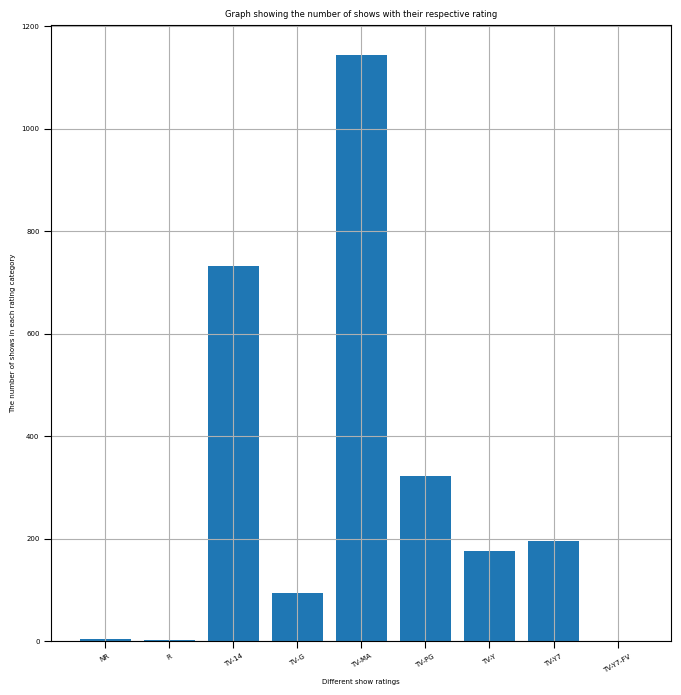

In [69]:
#The next step is to now produce the bar plot
plt.rcParams.update(
    {
        "lines.markersize": 10,
        "font.size": 5,
        "xtick.major.size": 5,
        "ytick.major.size": 5,
    }
)
fig, ax = plt.subplots(figsize = (8,8))
ax.bar(ratings["rating"], ratings["size"])
ax.set_xticklabels(ratings["rating"], rotation=30, ha='center')
ax.grid()
ax.set_xlabel("Different show ratings")
ax.set_ylabel("The number of shows in each rating category")
ax.set_title("Graph showing the number of shows with their respective rating")
print(len(df))

<class 'pandas.core.series.Series'>
8807


C:\Users\User\AppData\Local\Temp\ipykernel_19488\1668166500.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_variables, rotation=30, ha='center')


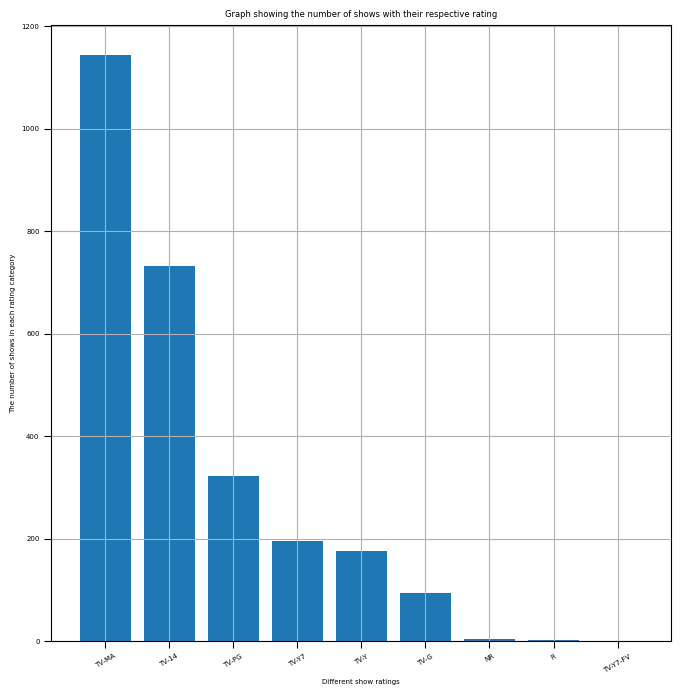

In [70]:
#Alternative method
grouped_ratings = TV_shows["rating"].value_counts()
print(type(grouped_ratings))
x_variables = grouped_ratings.index.to_list() #picks the index column
y_variables = grouped_ratings

#The next step is to now produce the bar plot
plt.rcParams.update(
    {
        "lines.markersize": 10,
        "font.size": 5,
        "xtick.major.size": 5,
        "ytick.major.size": 5,
    }
)
fig, ax = plt.subplots(figsize = (8,8))
ax.bar(x_variables, y_variables)
ax.set_xticklabels(x_variables, rotation=30, ha='center')
ax.grid()
ax.set_xlabel("Different show ratings")
ax.set_ylabel("The number of shows in each rating category")
ax.set_title("Graph showing the number of shows with their respective rating")
print(len(df))

In this next one, our task is to produce a histogram of the release dates

2021
1925
2


Text(0.5, 1.0, 'Histogram for movie release dates')

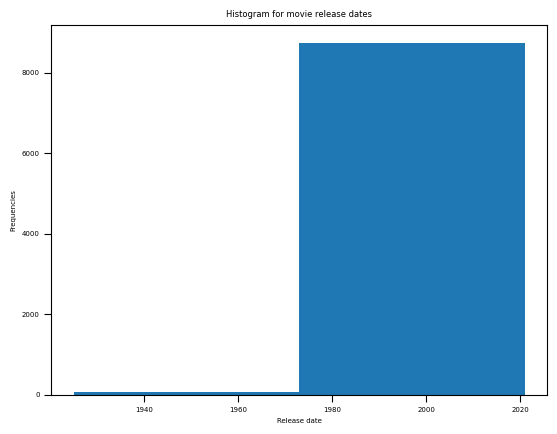

In [71]:
max_year = df["release_year"].max()
min_year = df["release_year"].min()
print(max_year)
print(min_year)
half_decade = 50
bin_number = len(range(min_year, max_year, half_decade))
print(bin_number) # this results in a bin number of 2
fig, ax = plt.subplots()
ax.hist(df["release_year"], bins = bin_number)
ax.set_xlabel("Release date")
ax.set_ylabel("Frequencies")
ax.set_title("Histogram for movie release dates")

Here, our task it to plot a line graph of the number of films released each year from 1990 to 2021. Our maximum is 2021 so we only need one filter - that one for 1990. My approach will be to implement the filter on the dataframe then proceed with the plotting

In [72]:
types = df.groupby(['type'], as_index = False).size()
print(types) #This returns only two types - Movies and TV shows
filtered_movies = movies.loc[movies["release_year"]>=1990]
print(len(movies)) # This returns 6131
print(len(filtered_movies))#This returns 5896 to show that there has actually been a filtration process. To confirm, we can check what the new least year is
print(filtered_movies["release_year"].min()) # This returns 1990 which is what we expected

      type  size
0    Movie  6131
1  TV Show  2676
6131
5896
1990


In [73]:
#The next step is to now generate the graph. We havent checked if there are any missing values yet. For this, we can use the isna method then compute the sum (as we did in the previous question)

print(filtered_movies["release_year"].isna().sum()) # This returns a 0 meaning that all the values are present hence no need to drop or add anything
#So now, we proceed to the plot

0


In [74]:
release_years = movies.groupby(["release_year"], as_index = False).size()
release_years # this returns a dataframe that contains the index column, the first column (called release_year) and the second column called size (which has the total number of movies released in that year)

,release_year,size
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,1
...,...,...
68,2017,767
69,2018,767
70,2019,633
71,2020,517


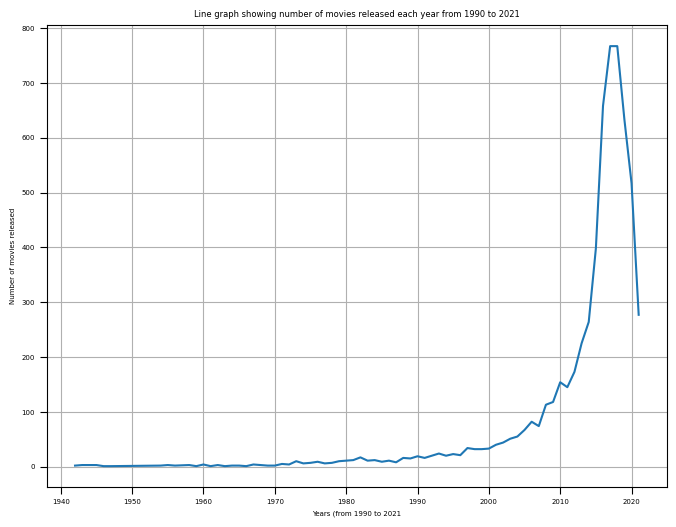

In [75]:
#The next step is to now plot the data in a line graph
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(release_years["release_year"], release_years["size"])
ax.set_xlabel("Years (from 1990 to 2021")
ax.set_ylabel("Number of movies released")
ax.set_title("Line graph showing number of movies released each year from 1990 to 2021")
ax.grid() # This is to set the grid to turn on with the object oriented approach

#Source: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

Now we are generating a scatterplot for the film duration compared to the year during which the film was released. This is aimed at helpin us understand if there is any correlation between the passage of time and the length of movies

In [76]:
#We already have the data but it is always worthwhile to check and ensure that there is nothing missing.
print(movies["integer_time"].isna().sum()) # This returns 3 which means that there are three missing datapoints.
print(movies["release_year"].isna().sum()) # This returns 0 which means that nothing is missing.
#Now we will consider dropping the rows in which the data is missing
movies_integer_time = movies.dropna()
print(movies_integer_time["integer_time"].isna().sum()) # Now this returns 0 to mean that all the NaN values have been dropped.

3
0
0


Text(0.5, 1.0, 'Scatterplot showing the relationship between movie duration and its release year')

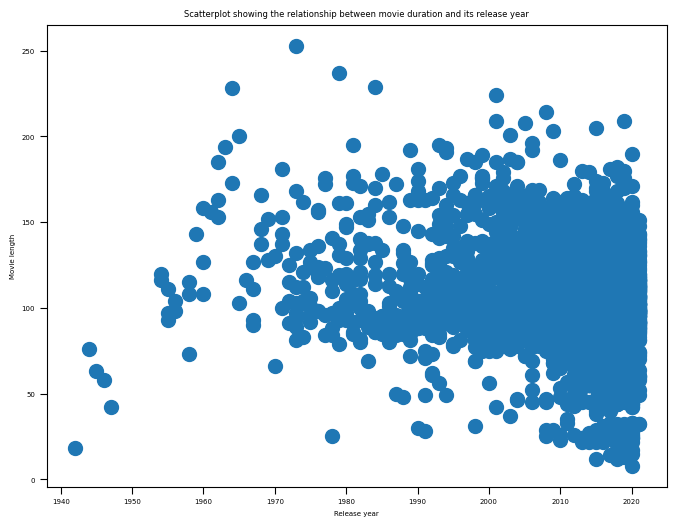

In [77]:
#Now, we proceed to the plots
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(movies_integer_time["release_year"], movies_integer_time["integer_time"])
ax.set_xlabel("Release year")
ax.set_ylabel("Movie length")
ax.set_title("Scatterplot showing the relationship between movie duration and its release year")

In [78]:
#Then finally, we try to establish if there is any relationship using the Pearson correlation coefficient. This is best done using the pandas library
movies_integer_time.corr()
#This returns a 2 by 2 table
# 	           release_year	integer_time
# release_year	1.000000	-0.212642
# integer_time	-0.212642	1.000000
#We observe a -0.21 correlation. The -ve shows that as one variable went up (the years), the movie duration went lower. But the correlation index is 0.21 which is quite a weak index hence indicating that there is no correlation between the movie duration and the years in which they are produced

C:\Users\User\AppData\Local\Temp\ipykernel_19488\3000988799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies_integer_time.corr()


,release_year,integer_time
release_year,1.000000,-0.212642
integer_time,-0.212642,1.000000


For this last one, our task is to produce a heatmap that shows the different genres that show up on Netflix.
I think the first thing we need to do is the group by so that we get the numbers set then we can proceed with the plot


In [79]:
genres = df.groupby(["type"], as_index = False).size()
genres

,type,size
0,Movie,6131
1,TV Show,2676
